# PHYS 3317 -- Introduction to Finite Differences

Please hand in this completed notebook before next lab by uploading it to blackboard.

<font color="red"><em> Vineet Kamat </em></font>

## Numerically taking derivatives 

### Preliminaries

In this section we show one approach to taking a function defined on a grid, and estimating its derivative.

<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit.  Use the icons to add cells, or move them around.</em>

In [77]:
%pylab inline
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [78]:
grid=arange(0,10,0.1)  #this generates a sequence of equally spaced real numbers
grid                 #this prints out the result

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

Alternatively, we could generate the grid by specifying the range and number of points

In [79]:
grid=linspace(0.,9.9,100)
grid

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [80]:
f=sin(grid)  # this evaluates the function "sin" on this grid
f            # this prints out the result

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

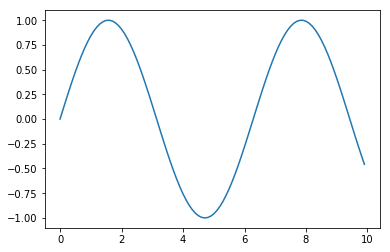

In [81]:
plot(grid,f)  # this plots the function

<b>Problem (1)</b> To test our derivative function we need the exact result.  Lets call the set of values of the derivative g.

In [82]:
g= cos(grid)
g

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.81

<b> Problem (2)</b> Plot g

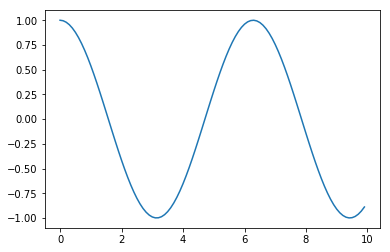

In [83]:
plot(grid,g)

### Finite difference

The simplest finite difference approximation is 

$$f'(x)\approx \frac{f(x+\delta)-f(x-\delta)}{2\delta}$$


In our current situation we can recognize this as a matrix expression


$$
\left(
\begin{array}{c}
f'(0)\cr
f'(0.1)\cr
f'(0.2)\cr
\vdots\cr
f'(10)
\end{array}\right)\approx
\left(
\begin{array}{ccccc}
0&5&\cdots&&\cr
-5&0&5&0&\cdots\cr
0&-5&0&5&\cdots\cr
\vdots\cr
\vdots
\end{array}
\right)
\left(
\begin{array}{c}
f(0)\cr
f(0.1)\cr
f(0.2)\cr
\vdots\cr
f(10)
\end{array}\right)
$$


where the 5's are all $1/(2\delta)$

We want to generate this matrix.

Since most of the entries of the finite difference matrix are zero, it is known as a "sparse" matrix.  The following code loads the required packages to work with sparse matrices, and makes the matrix we are interested in.

<strong> Download the file <code> showmat.py </code> and save it in the directory you are running this notebook from. </strong>

In [84]:
from scipy.sparse import *  # loads the required functions
from showmat import showmat

In [85]:
?dia_matrix # opens window with info about sparse matrix format we will be using
#close window by hitting separation bar

In [86]:
unitlist=ones(len(grid))  # just a list of 1's whose length is equal to the length of the grid
delta=grid[1]-grid[0]    # this is our step size
ln=len(grid)          # this is the size of the matrix
dmat=dia_matrix(       # we are generating a sparse matrix by specifying the diagonals
     ((unitlist/(2.*delta),-unitlist/(2.*delta)),(1,-1)),  # this line specifies how we fill the diagonals
     shape=(ln,ln))  # here is the matrix

In [87]:
dmat

<100x100 sparse matrix of type '<type 'numpy.float64'>'
	with 198 stored elements (2 diagonals) in DIAgonal format>

In [88]:
dmat.todense() # This command converts the sparse matrix to a dense form

matrix([[ 0.,  5.,  0., ...,  0.,  0.,  0.],
        [-5.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0., -5.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  5.,  0.],
        [ 0.,  0.,  0., ..., -5.,  0.,  5.],
        [ 0.,  0.,  0., ...,  0., -5.,  0.]])

In [89]:
showmat(dmat.todense()) # a more pretty way of printing the matrix

,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


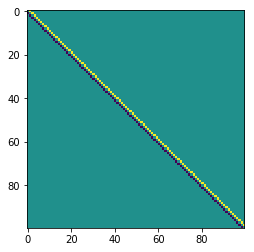

In [90]:
imshow(dmat.todense()) #this is a general purpose image plotting routin

In [91]:
?imshow

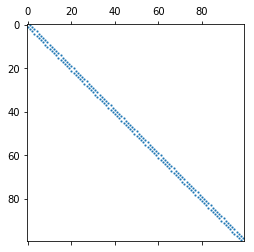

In [92]:
spy(dmat,markersize=1) # This is a more special-purpose plotting routine that looks at the structure of a sparse matrix

In [93]:
?spy

To learn more about <tt>dia_matrix</tt> just do a Google search.  One thing you will find is that to multiply a vector by this matrix you use the following syntax.

In [94]:
approxg=dmat.dot(f)  #yes this is not the most intuitive syntax, but it is also not horrible

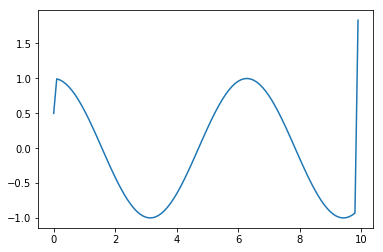

In [95]:
plot(grid,approxg)

<b>(3)</b> Using these techniques, write a function which given a uniform grid, spits out a finite difference matrix.  A skeleton is below

In [96]:
def makedermat(grid):
    unitlist=ones(len(grid))  # just a list of 1's whose length is equal to the length of the grid
    delta=grid[1]-grid[0]    # this is our step size
    ln=len(grid)          # this is the size of the matrix
    mat=dia_matrix(       # we are generating a sparse matrix by specifying the diagonals
     ((unitlist/(2.*delta),-unitlist/(2.*delta)),(1,-1)),  # this line specifies how we fill the diagonals
    shape=(ln,ln))  # here is the matrix
    # Fill in the function
    # you should define a matrix mat
    #
    #
    return mat  # this should be the last line of the function -- it returns the matrix mat

<b>(4)</b> Test the makedermat function and make sure it works.

In [97]:
grid = [0,1,2,3,4]
mat5 = makedermat(grid)
showmat(mat5.todense())

,0.5,,,
-0.5,,0.5,,
,-0.5,,0.5,
,,-0.5,,0.5
,,,-0.5,


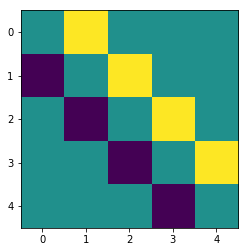

In [98]:
imshow(mat5.todense())

In [99]:
grid = linspace(0,10,100)
mat_large = makedermat(grid)
showmat(mat_large.todense())

,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,-4.95,,4.95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


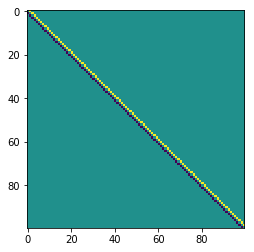

In [100]:
imshow(mat_large.todense())

### Refinements

You probably noticed that the edges don't look right in our derivative.  This is because we have implicitly assumed that our function f vanishes outside of the grid.  The derivatives of functions that vanish at the boundary will look right.

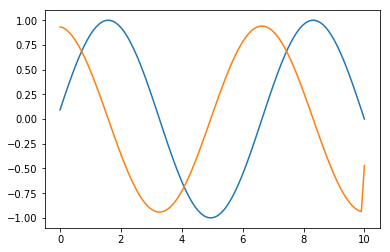

In [101]:
f2=sin(3*pi*(grid+0.1)/10.1) # this function vanishes on the boundary
g2=dmat.dot(f2) # here is its derivative
plot(grid,f2,grid,g2)

If we want to assume something different, we would use a different edges.  For example, if we linearly extrapolate, we would assume 
$$f(-\delta) =2*f(0)- f(\delta)$$.  To use this assumption we would change the derivative matrix as follows

In [102]:
extrapdmat=array(dmat.todense())
extrapdmat[0,0]=-10
extrapdmat[0,1]=10
extrapdmat[-1,-1]=10
extrapdmat[-1,-2]=-10
showmat(extrapdmat)

-10,10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,-5,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [103]:
betterapproxg=dot(extrapdmat,f)

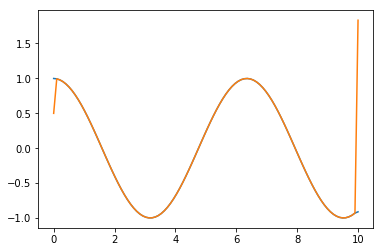

In [104]:
plot(grid,betterapproxg,grid,approxg)

One very common set of boundary conditions used in quantum mechanics is "periodic boundary conditions".  This is like a video game where when you walk off the right hand side of the screen you come back on the left.  Mathematically it means we are working with functions $f$, where $f(x+L)=f(x)$, where $L$ is the length of your grid.

<b>(5)</b> Make a matrix which corresponds to the first derivative when we assume periodic boundary conditions.

In [118]:
grid = linspace(0,2*pi,30)
extrapdmat = makedermat(grid)
periodicdmat=array(extrapdmat.todense())
change = periodicdmat[0,1]
periodicdmat[0,len(grid)-1]=-2*change
periodicdmat[0,1]= 2*change
periodicdmat[len(grid)-1,len(grid)-2]= -2*change
periodicdmat[len(grid)-1,0]=2*change




In [119]:
showmat(periodicdmat)

,4.62,,,,,,,,,,,,,,,,,,,,,,,,,,,,-4.62
-2.31,,2.31,,,,,,,,,,,,,,,,,,,,,,,,,,,
,-2.31,,2.31,,,,,,,,,,,,,,,,,,,,,,,,,,
,,-2.31,,2.31,,,,,,,,,,,,,,,,,,,,,,,,,
,,,-2.31,,2.31,,,,,,,,,,,,,,,,,,,,,,,,
,,,,-2.31,,2.31,,,,,,,,,,,,,,,,,,,,,,,
,,,,,-2.31,,2.31,,,,,,,,,,,,,,,,,,,,,,
,,,,,,-2.31,,2.31,,,,,,,,,,,,,,,,,,,,,
,,,,,,,-2.31,,2.31,,,,,,,,,,,,,,,,,,,,
,,,,,,,,-2.31,,2.31,,,,,,,,,,,,,,,,,,,
,,,,,,,,,-2.31,,2.31,,,,,,,,,,,,,,,,,,


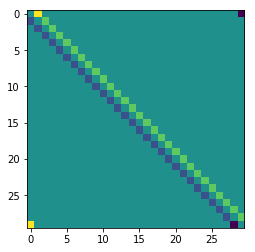

In [120]:
imshow(periodicdmat)

In [121]:
grid = linspace(0,2*pi,30)
sin_x = sin(grid)
testapproxd=dot(periodicdmat,sin_x)

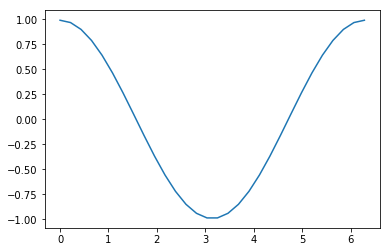

In [122]:
plot(grid,testapproxd)

## Questions

<b>(6)</b> Is the matrix <tt>dmat</tt> Hermitian?  Unitary?  AntiHermitian? None of these? <br>
If you do not remember what these mean, then do a web search.

<u> The matrix is not Hermitian because the conjugate transpose of the matrix will not return itself. Dmat is, however, antihermitian since the conjugate transpose is the negative of itself. The matrix is also not unitary the conjugate transpose of dmat is not its inverse.</u>

<b>(7)</b> Recall that an observable must be Hermitian.  <br> How can you generate an operator from <tt> dmat</tt> which is Hermitian?  

<u>Since the matrix is a derivative, we could create an approximate hamiltonian using this matrix.</u>

<b>(8)</b> Is the matrix <tt>extrapdmat</tt> Hermitian?  Unitary?  AntiHermitian? None of these?

<u>extrapdmat is not Hermitian, nor Unitary, nor AntiHermitian.</u>

<b>(9)</b> Is the matrix <tt>periodicdmat</tt> Hermitian? Unitary? AntiHermitian? None of These

<u>periodicdmat is not Hermitian or Unitary, but it is AntiHermitian becuase the matrix is its own negative adjoint.</u>

A consequence of these observations is that the momentum operator is only a well defined observable under special boundary conditions.  These boundary conditions include:  <em>hard wall, periodic</em>

<b>(10)</b> Generate a matrix which represents a second derivative

In [178]:
grid = linspace(0,1,10)
unitlist=ones(len(grid))  # just a list of 1's whose length is equal to the length of the grid
delta=grid[1]-grid[0]    # this is our step size
ln=len(grid)          # this is the size of the matrix
dmat=dia_matrix(       # we are generating a sparse matrix by specifying the diagonals
     ((unitlist/(2.*delta),-unitlist/(2.*delta)),(1,-1)),  # this line specifies how we fill the diagonals
     shape=(ln,ln))  # here is the matrix
dmat

yuh = dot(dmat,dmat)

In [179]:
showmat(yuh.todense())

-20.25,,20.25,,,,,,,
,-40.5,,20.25,,,,,,
20.25,,-40.5,,20.25,,,,,
,20.25,,-40.5,,20.25,,,,
,,20.25,,-40.5,,20.25,,,
,,,20.25,,-40.5,,20.25,,
,,,,20.25,,-40.5,,20.25,
,,,,,20.25,,-40.5,,20.25
,,,,,,20.25,,-40.5,
,,,,,,,20.25,,-20.25
